### 4.2.1 ２乗和誤差

In [68]:
import numpy as np

# ニューラルネットワークの出力 (ソフトマックス関数)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  # 教師データ(one-hot記法)


def sum_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)


print(sum_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


### 4.4.2 交差エントロピー誤差

In [69]:
import numpy as np


def cross_entropy_error(y, t):
    delta = 1e-7  # y = 0のときのマイナス無限大回避
    return -np.sum(t * np.log(y + delta))


y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### 4.2.3 ミニバッチ学習

In [70]:
import numpy as np
from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

(60000, 784)
(60000, 10)
[18070 51652  4082 26130  6972 40141  5428 55157 12153 28567]


In [71]:
import numpy as np


# yはニューラルネットワークの出力, tは教師データ
# one-hot表現
def cross_entropy_error(y, t):
    if y.ndim == 1:
        # データが一つの場合
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return (
        -np.sum(t * np.log(y + 1e-7)) / batch_size
    )  # 1枚あたりの平均交差エントロピー誤差


# ラベル表現
def cross_entropy_error(y, t):
    if y.ndim == 1:
        # データが一つの場合
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 4.3 数値微分

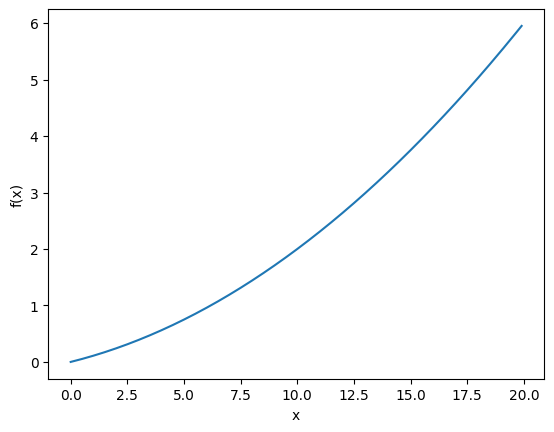

0.1999999999990898

In [72]:
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)  # 中心差分f(x + h) - f(x - h)を用いる


def function_1(x):
    return 0.01 * x**2 + 0.1 * x


x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

numerical_diff(function_1, 5)

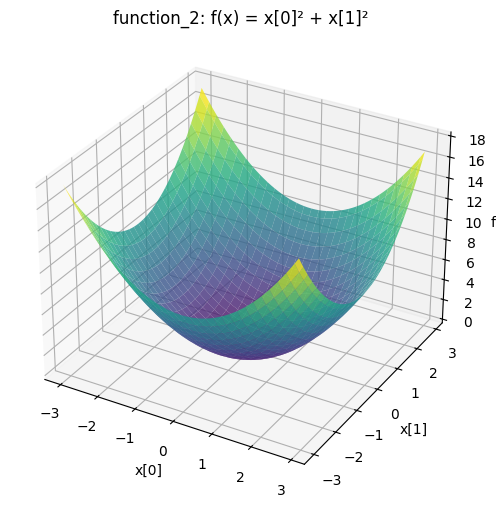

function_2([0, 0]) = 0
function_2([3, 4]) = 25
function_2([1, 1]) = 2


In [73]:
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)  # 中心差分f(x + h) - f(x - h)を用いる


def function_2(x):
    return x[0] ** 2 + x[1] ** 2  # np.sum(x**2)と同じ


# function_2の3D可視化
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# 3D surface plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, alpha=0.8, cmap="viridis")
ax.set_xlabel("x[0]")
ax.set_ylabel("x[1]")
ax.set_zlabel("f(x)")
ax.set_title("function_2: f(x) = x[0]² + x[1]²")
plt.show()

# function_2の特定点での値を表示
print(f"function_2([0, 0]) = {function_2([0, 0])}")
print(f"function_2([3, 4]) = {function_2([3, 4])}")
print(f"function_2([1, 1]) = {function_2([1, 1])}")

In [74]:
import numpy as np
import matplotlib.pylab as plt


def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # xと同じ形状で、全要素が0の配列
    print(x)
    print(x.size)
    for idx in range(x.size):
        tmp_val = x[idx]
        print(tmp_val)
        # f(x+h)の計算
        x[idx] = tmp_val + h
        print(x)
        fxh1 = f(x)
        print(fxh1)

        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        print(fxh2)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # もとに戻す
    return grad


def function_2(x):
    return x[0] ** 2 + x[1] ** 2  # np.sum(x**2)と同じ


numerical_gradient(function_2, np.array([3.0, 4.0]))

[3. 4.]
2
3.0
[3.0001 4.    ]
25.00060001
24.99940001
4.0
[3.     4.0001]
25.00080001
24.99920001


array([6., 8.])

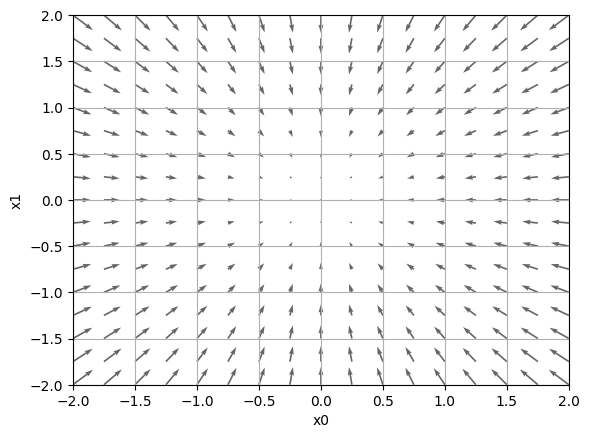

In [75]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 値を元に戻す

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


if __name__ == "__main__":
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.grid()
    plt.draw()
    plt.show()

### 4.4.1 勾配法

In [76]:
import numpy as np


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for _ in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x


gradient_descent(f=function_2, init_x=np.array([-3.0, 4.0]), lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

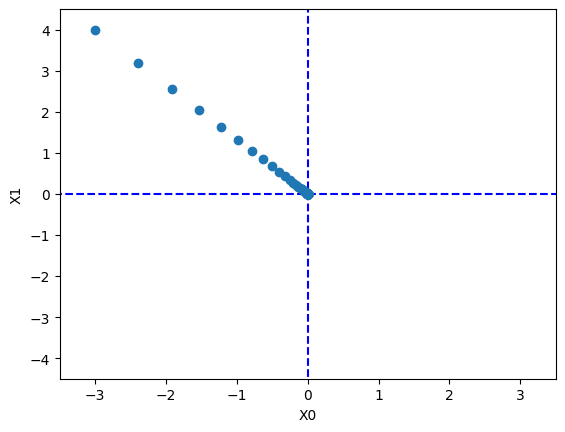

In [77]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0] ** 2 + x[1] ** 2


init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot([-5, 5], [0, 0], "--b")
plt.plot([0, 0], [-5, 5], "--b")
plt.plot(x_history[:, 0], x_history[:, 1], "o")

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 4.4.2 ニューラルネットワークに対する勾配

In [78]:
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # ガウス分布で初期化

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss


net = SimpleNet()
print(net.W)  # 重み
x = np.array([0.6, 0.9])  # 入力データ
p = net.predict(x)
print(p)
print(np.argmax(p))
t = np.array([0, 0, 1])  # 正解ラベル
print(net.loss(x, t))


def f(W):
    return net.loss(x, t)


dw = numerical_gradient(f, net.W)
print(dw)

[[-0.63275326 -1.0747203   1.22109521]
 [ 0.84223222  0.37117852  0.38503464]]
[ 0.37835704 -0.31077152  1.0791883 ]
2
0.5569022197285632
[[ 0.17057854  0.0856327  -0.25621124]
 [ 0.25586781  0.12844906 -0.38431686]]


### 4.5 学習アルゴリズムの実装
確率的勾配法(SGD)

In [79]:
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    # init_size: 入力層のニューロン数 hidden_size: 隠れ層のニューロン数 output_size: 出力層のニューロン数
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(
            input_size, hidden_size
        )  # 1層目の重み
        self.params["b1"] = np.zeros(hidden_size)  # 1層目のバイアス
        self.params["W2"] = weight_init_std * np.random.randn(
            hidden_size, output_size
        )  # 2層目の重み
        self.params["b2"] = np.zeros(output_size)  # 2層目のバイアス

    # x:画像データ
    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    # x: 画像データ, t: 正解ラベル
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])

        return grads

    # 高速版 5章で扱う手法
    def gradient(self, x, t):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads["W2"] = np.dot(z1.T, dy)
        grads["b2"] = np.sum(dy, axis=0)

        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads["W1"] = np.dot(x.T, da1)
        grads["b1"] = np.sum(da1, axis=0)

        return grads


net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params["W1"].shape)
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)

x = np.random.rand(100, 784)  # ダミーデータ100枚分
t = np.random.rand(100, 10)  # ダミーの正解ラベル100枚分
net.predict(x)
grads = net.numerical_gradient(x, t)
print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)

(784, 100)
(100,)
(100, 10)
(10,)
(784, 100)
(100,)
(100, 10)
(10,)


train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.7840666666666667, 0.7886
train acc, test acc | 0.8774166666666666, 0.879
train acc, test acc | 0.8993166666666667, 0.9009
train acc, test acc | 0.9073333333333333, 0.9091
train acc, test acc | 0.9137333333333333, 0.9162
train acc, test acc | 0.9187666666666666, 0.9216
train acc, test acc | 0.9229333333333334, 0.9241
train acc, test acc | 0.9270833333333334, 0.927
train acc, test acc | 0.93005, 0.9305
train acc, test acc | 0.93375, 0.9341
train acc, test acc | 0.9366333333333333, 0.9367
train acc, test acc | 0.9393166666666667, 0.9388
train acc, test acc | 0.9415333333333333, 0.9409
train acc, test acc | 0.9432, 0.9415
train acc, test acc | 0.9452333333333334, 0.944
train acc, test acc | 0.9466333333333333, 0.9452


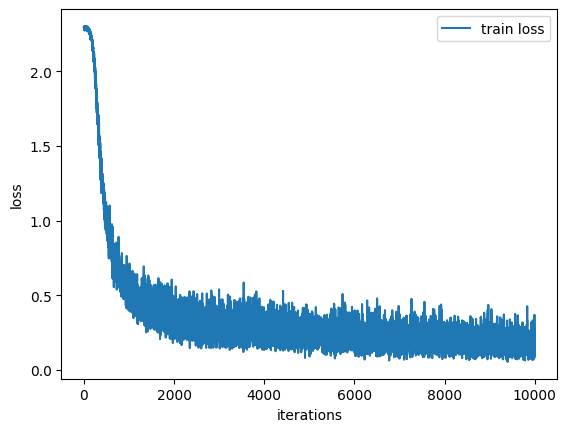

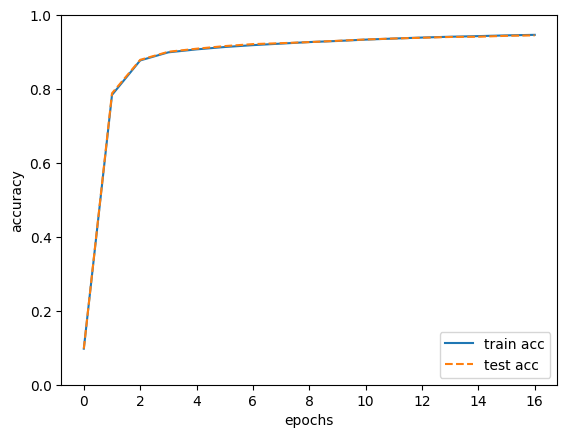

In [80]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配の計算
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)  # 高速版

    # パラメータの更新
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# train_loss_listのグラフの描画
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label="train loss")
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()
# train_acc_list, test_acc_listのグラフの描写
markers = {"train": "o", "test": "s"}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label="train acc")
plt.plot(x, test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()